In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bitcoin.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [3]:
df.shape

(2713, 7)

In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2713 non-null   object 
 1   Open       2713 non-null   float64
 2   High       2713 non-null   float64
 3   Low        2713 non-null   float64
 4   Close      2713 non-null   float64
 5   Adj Close  2713 non-null   float64
 6   Volume     2713 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 148.5+ KB


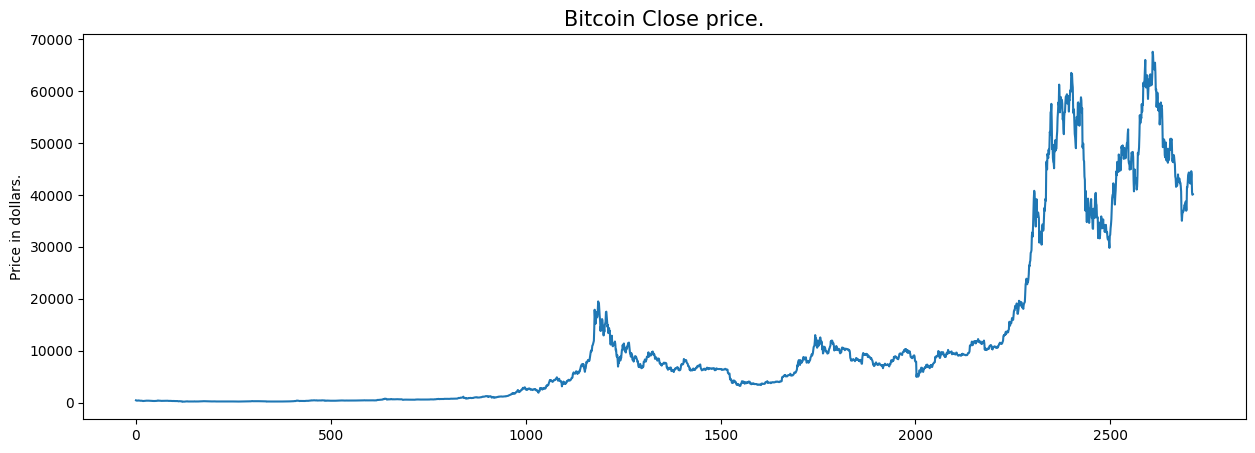

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(df['Close'])
plt.title('Bitcoin Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

In [7]:
df[df['Close'] == df['Adj Close']].shape, df.shape

((2713, 7), (2713, 7))

In [8]:
df = df.drop(['Adj Close'], axis=1)

In [9]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

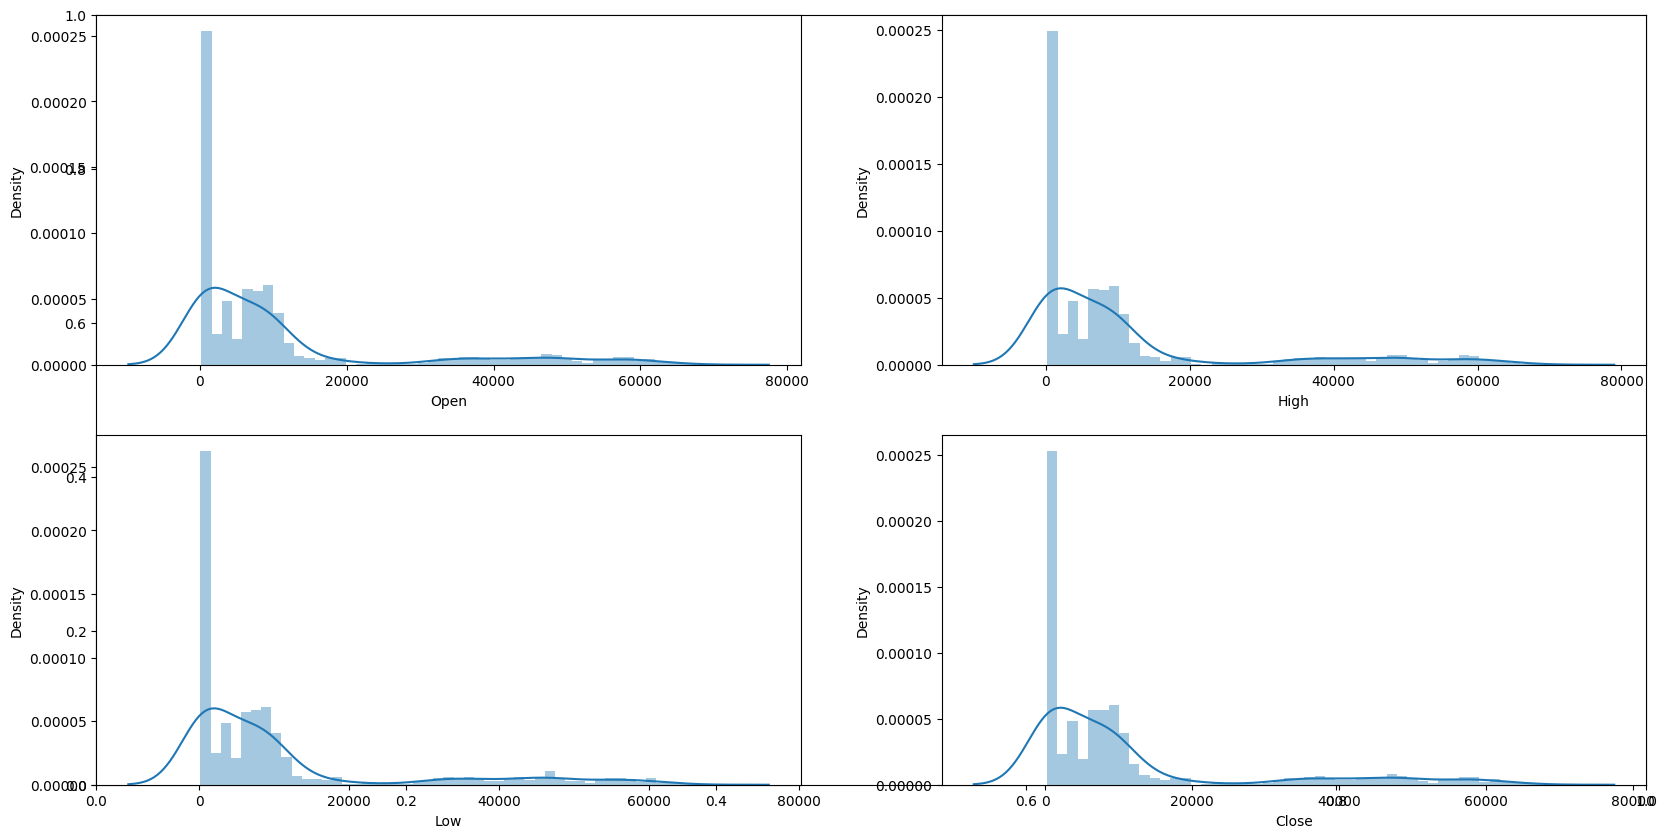

In [10]:
features = ['Open', 'High', 'Low', 'Close']

plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sn.distplot(df[col])
plt.show()

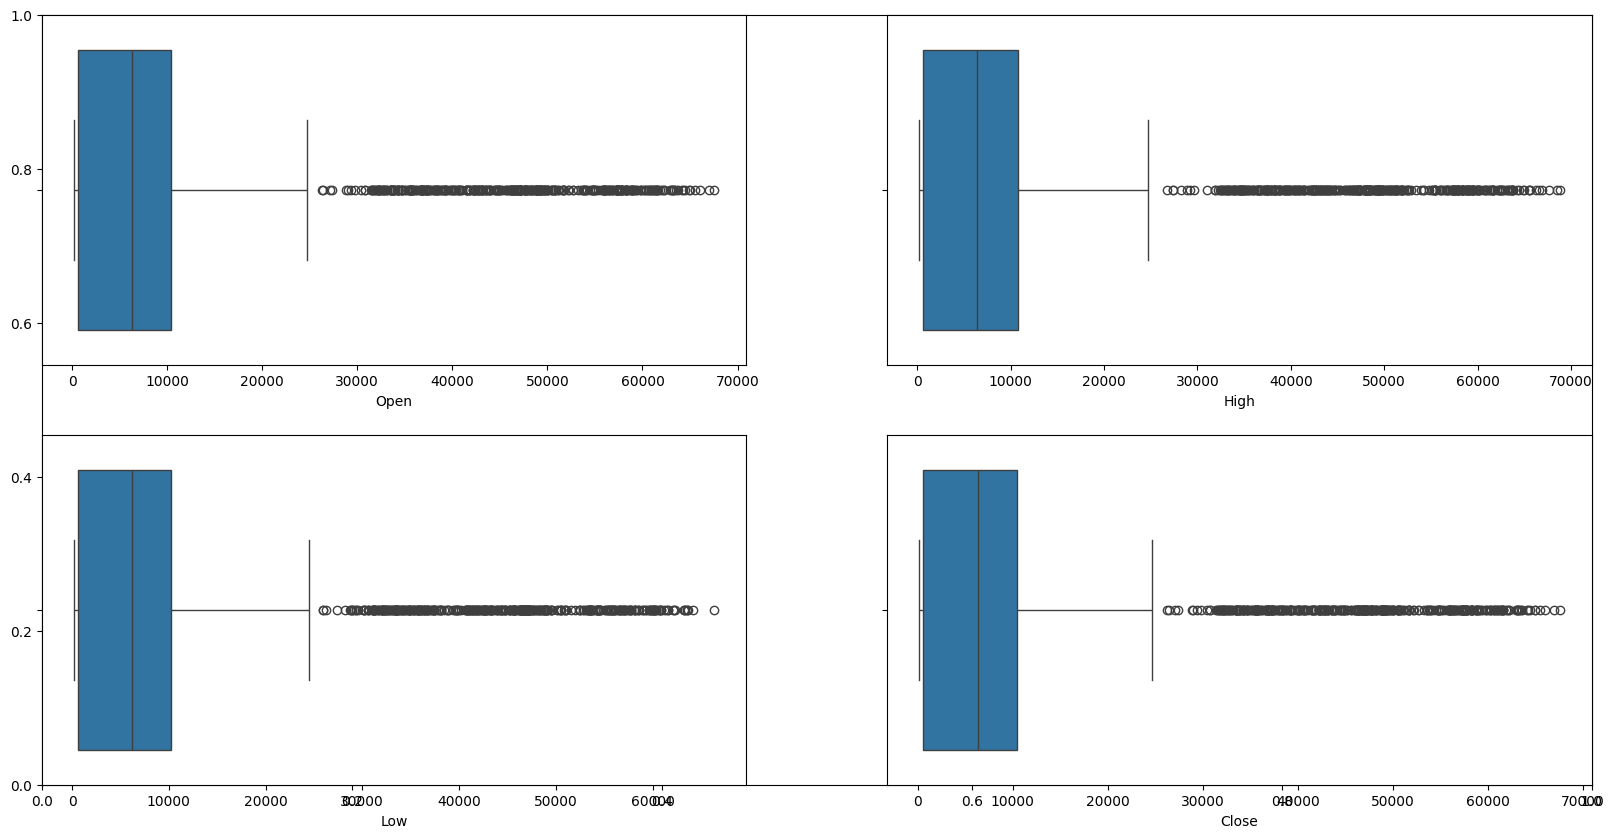

In [11]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,2,i+1)
  sn.boxplot(df[col], orient='h')
plt.show()

In [12]:
splitted = df['Date'].str.split('-', expand=True)

df['year'] = splitted[0].astype('int')
df['month'] = splitted[1].astype('int')
df['day'] = splitted[2].astype('int')

# Convert the 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Open,High,Low,Close,Volume,year,month,day
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21


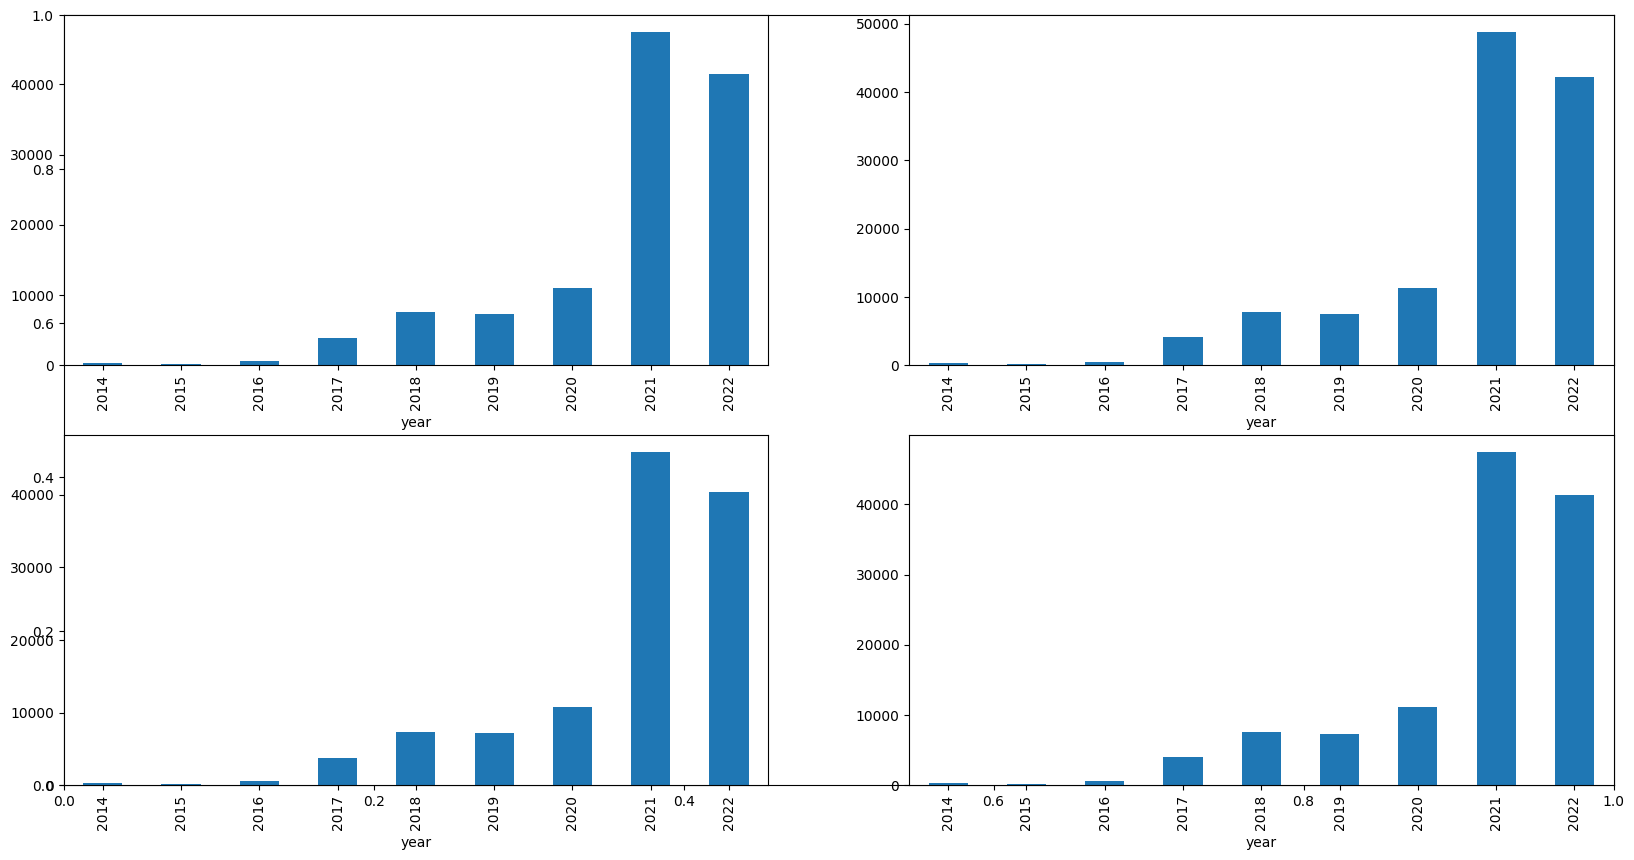

In [13]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [14]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()


,Date,Open,High,Low,Close,Volume,year,month,day,is_quarter_end
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800,2014,9,17,1
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200,2014,9,18,1
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700,2014,9,19,1
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600,2014,9,20,1
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100,2014,9,21,1


# EDA

In [15]:
# Basic information
print("----- Dataset Info -----")
print(df.info())
print("\n----- First 5 Rows -----")
print(df.head())
print("\n----- Summary Statistics -----")
print(df.describe())

----- Dataset Info -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            2713 non-null   datetime64[ns]
 1   Open            2713 non-null   float64       
 2   High            2713 non-null   float64       
 3   Low             2713 non-null   float64       
 4   Close           2713 non-null   float64       
 5   Volume          2713 non-null   int64         
 6   year            2713 non-null   int64         
 7   month           2713 non-null   int64         
 8   day             2713 non-null   int64         
 9   is_quarter_end  2713 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(5)
memory usage: 212.1 KB
None

----- First 5 Rows -----
        Date        Open        High         Low       Close    Volume  year  \
0 2014-09-17  465.864014  468.174011  452.421997  457.334015  

In [16]:
# Check Missing Values
print("\n----- Missing Values -----")
print(df.isnull().sum())


----- Missing Values -----
Date              0
Open              0
High              0
Low               0
Close             0
Volume            0
year              0
month             0
day               0
is_quarter_end    0
dtype: int64


# Visualization

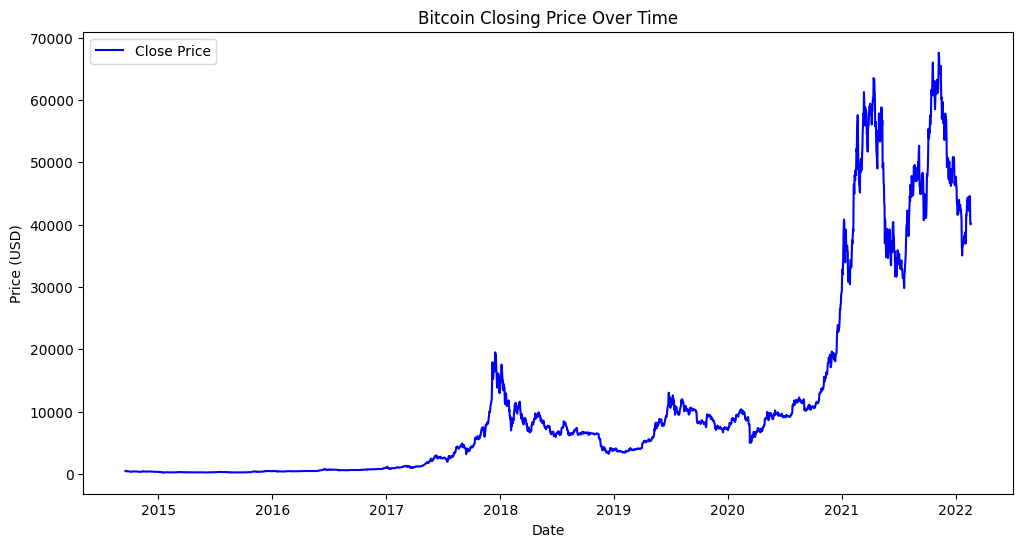

In [17]:
# Closing Price Over Time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label="Close Price", color='blue')
plt.title("Bitcoin Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()


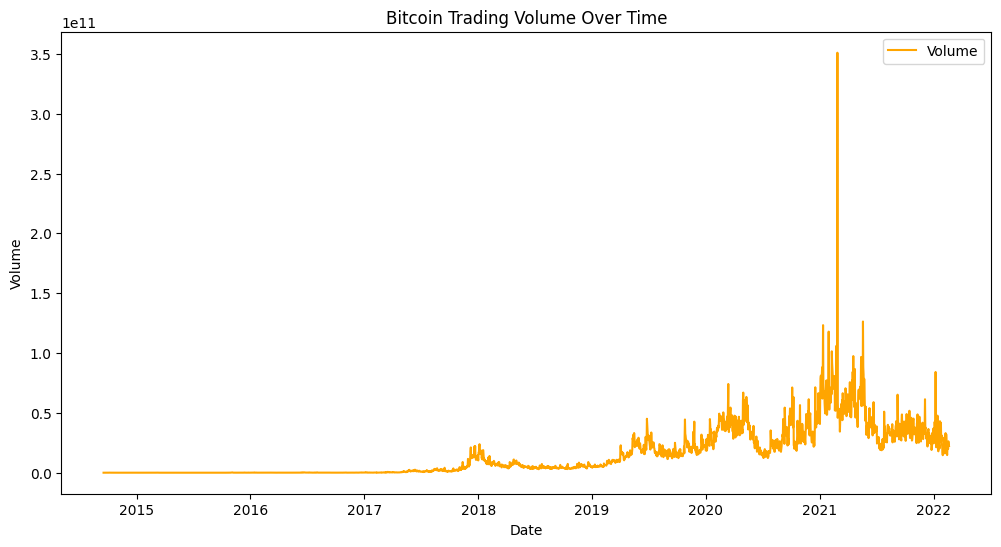

In [18]:
# Volume Over Time
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Volume'], label="Volume", color='orange')
plt.title("Bitcoin Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.show()

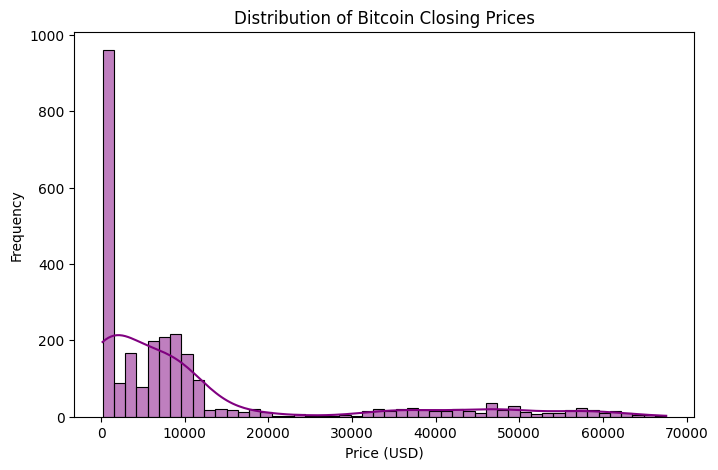

In [19]:
# Distribution of Closing Prices
plt.figure(figsize=(8,5))
sn.histplot(df['Close'], bins=50, kde=True, color="purple")
plt.title("Distribution of Bitcoin Closing Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

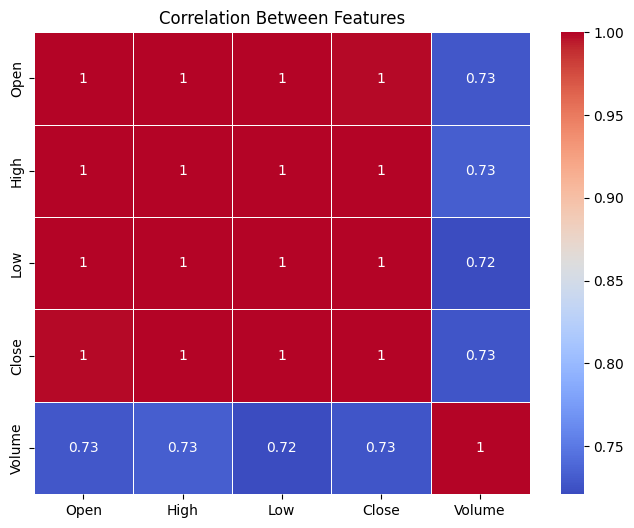

In [20]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sn.heatmap(df[['Open','High','Low','Close','Volume']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Between Features")
plt.show()

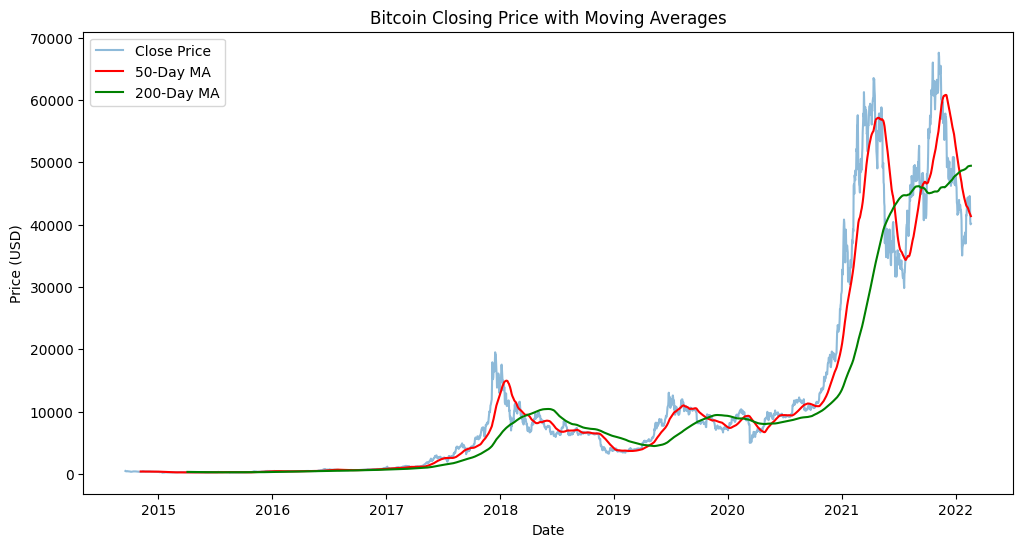

In [21]:
# Moving Average (Trend Analysis)
df['MA50'] = df['Close'].rolling(50).mean()
df['MA200'] = df['Close'].rolling(200).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label="Close Price", alpha=0.5)
plt.plot(df['Date'], df['MA50'], label="50-Day MA", color="red")
plt.plot(df['Date'], df['MA200'], label="200-Day MA", color="green")
plt.title("Bitcoin Closing Price with Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

# Univarient Analysis

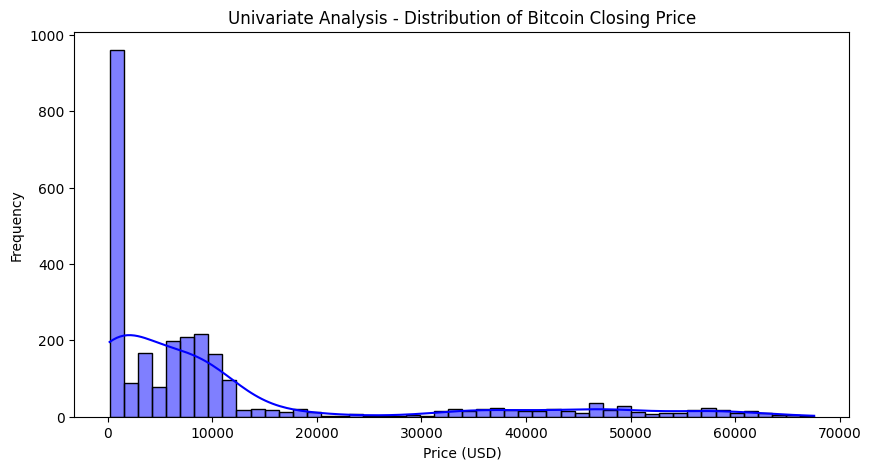

In [22]:
# Histogram of Closing Price
plt.figure(figsize=(10,5))
sn.histplot(df['Close'], bins=50, kde=True, color="blue")
plt.title("Univariate Analysis - Distribution of Bitcoin Closing Price")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

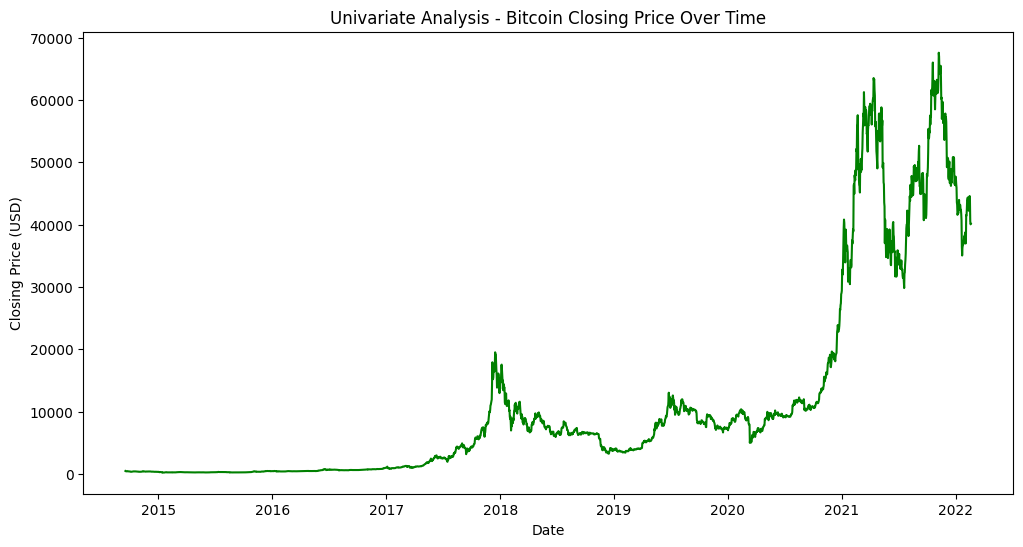

In [23]:

# Line Plot of Closing Price
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], color="green")
plt.title("Univariate Analysis - Bitcoin Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.show()

# Bivarient Analysis

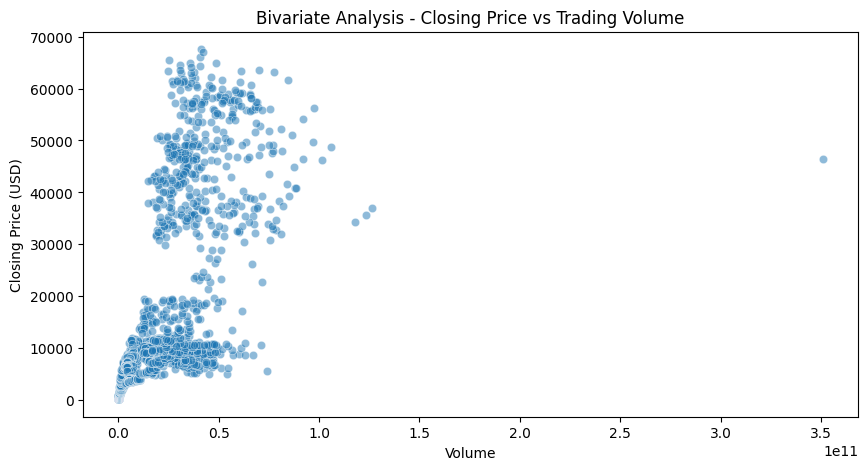

In [24]:
# Scatter Plot between Closing Price & Volume
plt.figure(figsize=(10,5))
sn.scatterplot(x=df['Volume'], y=df['Close'], alpha=0.5)
plt.title("Bivariate Analysis - Closing Price vs Trading Volume")
plt.xlabel("Volume")
plt.ylabel("Closing Price (USD)")
plt.show()

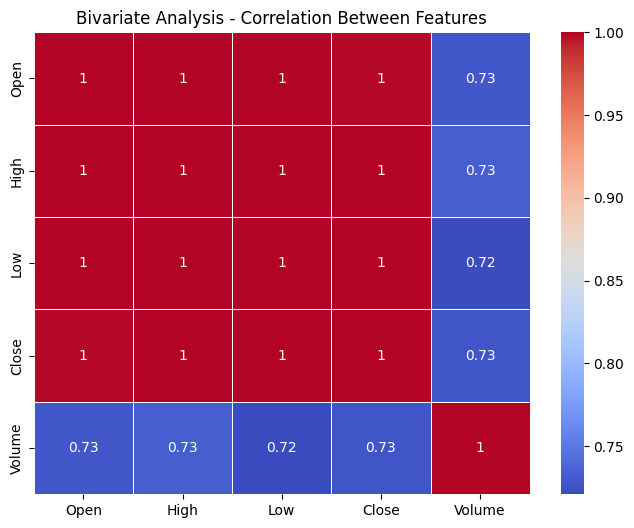

In [25]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sn.heatmap(df[['Open','High','Low','Close','Volume']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Bivariate Analysis - Correlation Between Features")
plt.show()

In [26]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

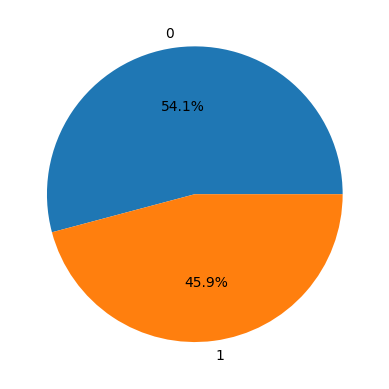

In [27]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

# Final report

- The Closing Price is the target column to predict, i.e. Regression Problem.

- Bitcoin prices are highly volatile with several sharp peaks and drops over the years.

- The features Open, High, Low, and Close are highly correlated (>0.95).

- Volume shows weak correlation with price, meaning high trading activity doesn’t always mean higher price.

- Bitcoin has a right-skewed distribution — most prices lie in lower ranges with few extreme highs.

- Price has shown strong growth trend over long term, despite short-term volatility.

- During bull runs, Bitcoin prices surge rapidly, often followed by correction phases.

- Closing price is the most reliable indicator for modeling Bitcoin’s future trends.

# Model Training & Evaluation 

In [28]:
#Model Training & Evaluation 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming df is already defined
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']

# Scaling the features
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Split the data into training and validation (test) sets
X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.3, random_state=42)

# 'test_size=0.3' means 30% of the data will be used for testing, and 70% for training


In [29]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()

LogisticRegression() : 
Training Accuracy :  0.5319642853158836
Validation Accuracy :  0.5117827868852459

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.5341406767673837
Validation Accuracy :  0.5287556108508977

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training 

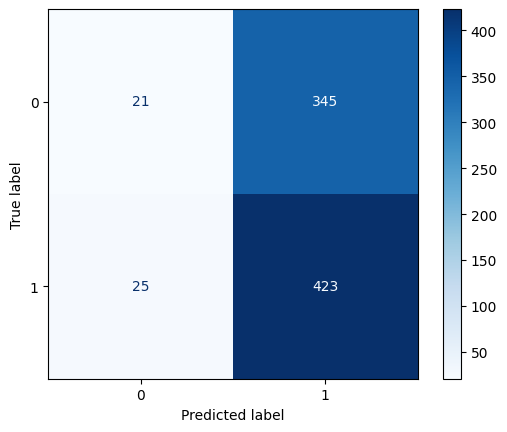

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid, cmap='Blues')
plt.show()
